
2109106102
Adhitya Saputra
POSTTEST 5
Import Library

Membaca Dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score 

In [2]:
df = pd.read_csv('Corona_NLP_test.csv')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative



A. Supervised Learning
Support Vector Classifier (dari SVM)

Pisahkan fitur (X) dan label (y)

In [3]:
X = df[['UserName', 'ScreenName']] 
y = df['Sentiment'] 

Bagi dataset menjadi data pelatihan dan data pengujian

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Inisialisasi model SVC

In [5]:
svc = SVC()


Latih model SVC pada data pelatihan

In [6]:
svc.fit(X_train, y_train)

SVC()

Lakukan prediksi dengan SVC pada data pengujian

In [7]:
y_pred_svc = svc.predict(X_test)

Hitung confusion matrix dengan SVC

In [8]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

Hitung classification report dengan SVC

In [9]:
class_report_svc = classification_report(y_test, y_pred_svc)

c:\Users\Adtsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adtsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adtsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Tampilkan hasil evaluasi dengan SVC

Confusion Matrix

In [10]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

Visualisasi Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (SVC)')

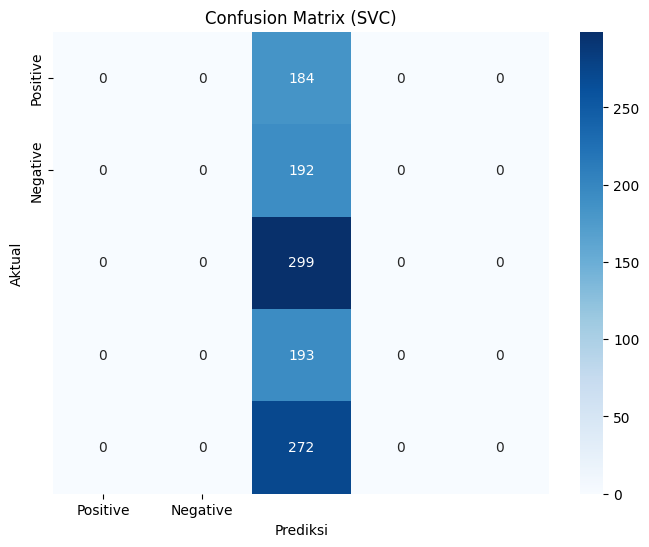

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (SVC)')

Classification Report

In [12]:
class_report_svc = classification_report(y_test, y_pred_svc)

c:\Users\Adtsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adtsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adtsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Visualisasi Classification Report

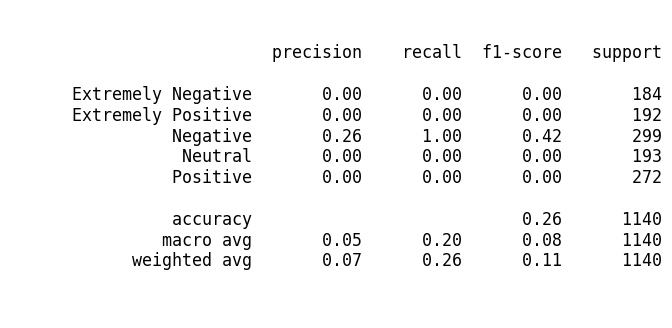

In [13]:
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_svc, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()


Plot Hasil Prediksi dan Target Asli dengan SVC

Konversi label kelas ke kode warna numerik

In [14]:
color_map = {'Positive': 'r', 'Negative': 'g', 'Neutral': 'b'}
y_pred_colors = [color_map[label] for label in y_pred_svc]
y_test_colors = [color_map[label] for label in y_test if label in color_map]

Visualisasi Data

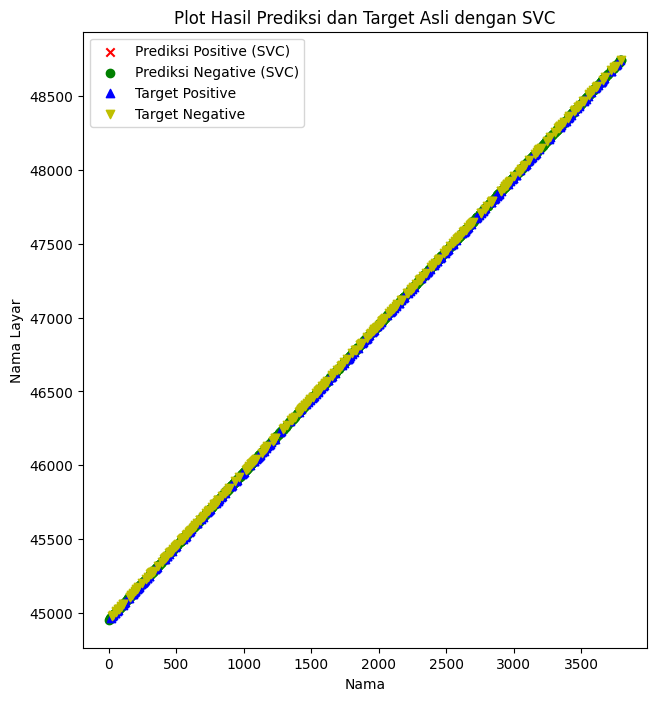

In [16]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

# Titik-titik hasil prediksi SVC dengan warna berbeda (hijau untuk benar, merah untuk salah)
# Prediksi Positive (SVC)
plt.scatter(X_test[y_pred_svc == 'Positive']['UserName'], X_test[y_pred_svc == 'Positive']['ScreenName'], c='r', marker='x', label='Prediksi Positive (SVC)')

# Prediksi Negative (SVC)
plt.scatter(X_test[y_pred_svc == 'Negative']['UserName'], X_test[y_pred_svc == 'Negative']['ScreenName'], c='g', marker='o', label='Prediksi Negative (SVC)')

# Titik-titik target asli dengan warna berbeda (biru untuk Positive, kuning untuk Negative)
# Target Positive
plt.scatter(X_test[y_test == 'Positive']['UserName'], X_test[y_test == 'Positive']['ScreenName'], c='b', marker='^', label='Target Positive')

# Target Negative
plt.scatter(X_test[y_test == 'Negative']['UserName'], X_test[y_test == 'Negative']['ScreenName'], c='y', marker='v', label='Target Negative')

plt.xlabel('Nama')
plt.ylabel('Nama Layar')
plt.title('Plot Hasil Prediksi dan Target Asli dengan SVC')
plt.legend(loc='best')
plt.show()


Implementasi Metode K-Nearest Neighbors (KNN)

Inisialisasi model KNN

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)

Latih model KNN pada data pelatihan

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Lakukan prediksi dengan KNN pada data pengujian

In [19]:
y_pred_knn = knn.predict(X_test)

Hitung confusion matrix dengan KNN

In [20]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

Hitung classification report dengan KNN

In [21]:
class_report_knn = classification_report(y_test, y_pred_knn)


Tampilkan hasil evaluasi dengan KNN

Confusion Matrix

In [22]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

Visualisasi Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (KNN)')

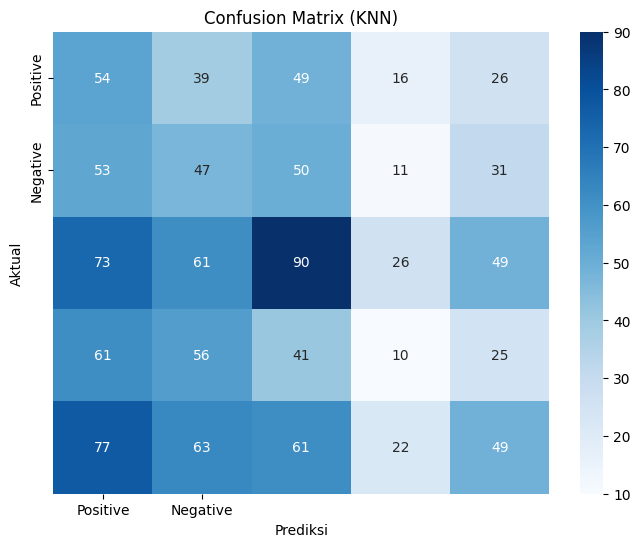

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (KNN)')

Classification Report

In [24]:
class_report_knn = classification_report(y_test, y_pred_knn)

Visualisasi Classification Report

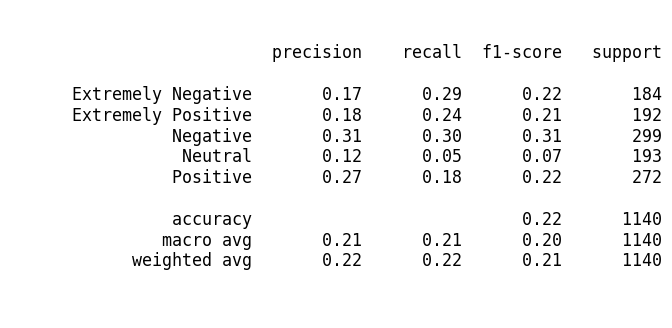

In [25]:
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_knn, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()


Plot Hasil Prediksi dan Target Asli dengan KNN

Visualisasi Data untuk model KNN

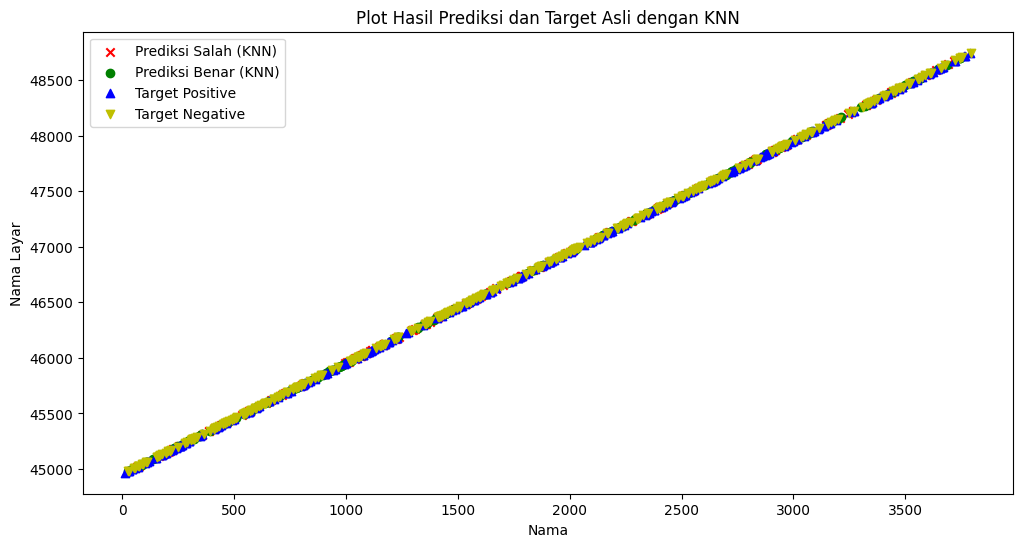

In [26]:
plt.figure(figsize=(12, 6))

# Titik-titik hasil prediksi KNN dengan warna berbeda (hijau untuk benar, merah untuk salah)
# Prediksi Positive (KNN)
plt.scatter(X_test[y_pred_knn == 'Positive']['UserName'], X_test[y_pred_knn == 'Positive']['ScreenName'], c='r', marker='x', label='Prediksi Salah (KNN)')

# Prediksi Negative (KNN)
plt.scatter(X_test[y_pred_knn == 'Negative']['UserName'], X_test[y_pred_knn == 'Negative']['ScreenName'], c='g', marker='o', label='Prediksi Benar (KNN)')

# Titik-titik target asli dengan warna berbeda (biru untuk Positive, kuning untuk Negative)
# Target Positive
plt.scatter(X_test[y_test == 'Positive']['UserName'], X_test[y_test == 'Positive']['ScreenName'], c='b', marker='^', label='Target Positive')

# Target Negative
plt.scatter(X_test[y_test == 'Negative']['UserName'], X_test[y_test == 'Negative']['ScreenName'], c='y', marker='v', label='Target Negative')

plt.xlabel('Nama')
plt.ylabel('Nama Layar')
plt.title('Plot Hasil Prediksi dan Target Asli dengan KNN')
plt.legend(loc='best')
plt.show()


Linear Regression

Pilih fitur dan label

In [27]:
X = df[['UserName','ScreenName']]

Gunakan 'UserName' sebagai label

In [28]:
y = df['ScreenName']

Bagi dataset menjadi data latih dan data uji

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membangun model Linear Regression

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()


Melakukan prediksi

In [31]:
y_pred = model.predict(X_test)

Menghitung MAE, MSE, RMSE, dan R2-Score

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)  
r2 = r2_score(y_test, y_pred)


Tampilkan hasil

In [33]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2-Score:", r2)

MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2-Score: 1.0


In [34]:
# Data metrik
metrics = ["MAE", "MSE", "RMSE", "R2-Score"]
values = [mae, mse, rmse, r2]

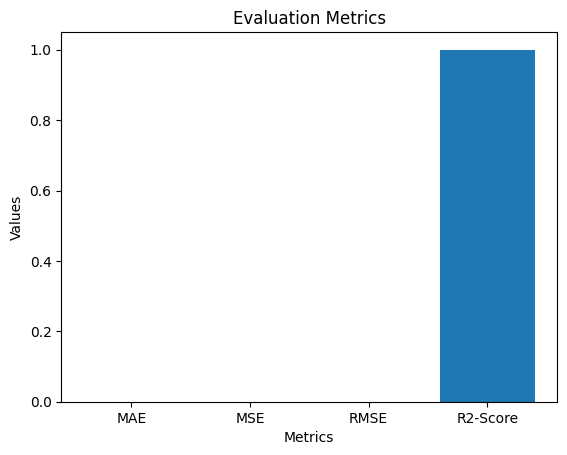

In [35]:
# Plot bar untuk menampilkan metrik
plt.bar(metrics, values)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Evaluation Metrics")
plt.show()

Plot Hasil Prediksi dan Target Asli

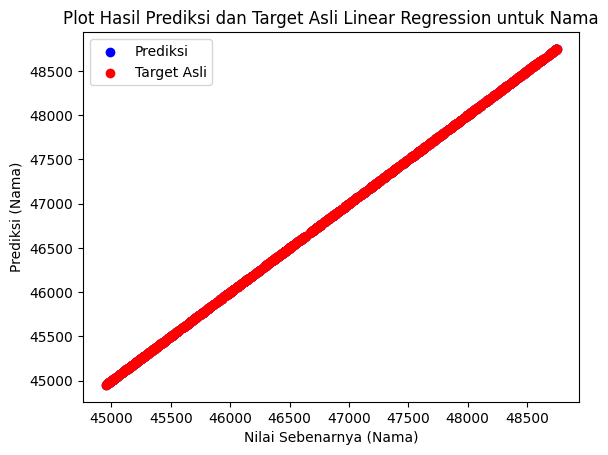

In [36]:
plt.scatter(y_test, y_pred, c='blue', label='Prediksi')
plt.scatter(y_test, y_test, c='red', label='Target Asli')
plt.xlabel("Nilai Sebenarnya (Nama)")
plt.ylabel("Prediksi (Nama)")
plt.title("Plot Hasil Prediksi dan Target Asli Linear Regression untuk Nama")
plt.legend()
plt.show()


B. Unsupervised Learning
B1. Implementasi Metode K-Means:

Menggunakan kolom UserName (kolom ke-0) dan educational-num (kolom ke-4)

In [44]:
X = df.iloc[:, [5, 4]].values 

Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok

In [45]:
wcss = []  

Buat loop untuk melatih algoritma K-Means dengan berbagai jumlah kluster (K)

In [47]:
for k in range(5, 4):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)


Buat grafik Elbow Method

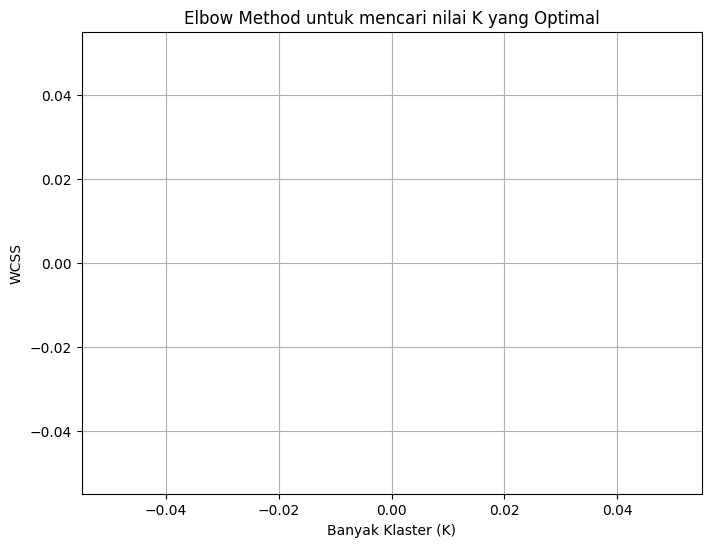

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(range(5, 4), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Inisialisasi model K-Means dengan nilai K yang sesuai

In [53]:
k = 3 
kmeans = KMeans(k, n_init=10)


Pilih hanya kolom "UserName" dan "ScreenName" sebagai fitur X.

In [54]:
X = df[["UserName", "ScreenName"]]


Fit model K-Means pada dataset

In [55]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)


Prediksi cluster untuk setiap data point dalam dataset

In [56]:
predicted_clusters = kmeans.predict(X)


Tambahkan kolom "cluster" ke dataset

In [57]:
df["cluster"] = predicted_clusters


B2. Evaluasi Cluster yang telah diprediksi

a. Unlabeled Dataset (Dataset Tanpa Label)

X adalah dataset yang telah di-cluster dengan K-Means

predicted_clusters adalah hasil clustering yang telah diprediksi

In [58]:
ss_score = silhouette_score(X, predicted_clusters)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, predicted_clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, predicted_clusters)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.59
Davies-Bouldin Index: 0.50
Calinski-Harabasz Index: 15178.90



b. Labeled Dataset (Dataset Dengan Label)

true_labels adalah kolom yang berisi label asli dataset

In [59]:
true_labels = df['Sentiment']

Menggantilah dengan nama dataset yang sesuai dan predicted_clusters yang sesuai

In [60]:
cross_tab = pd.crosstab(predicted_clusters, true_labels)
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
Sentiment  Extremely Negative  Extremely Positive  Negative  Neutral  Positive
row_0                                                                         
0                         212                 216       318      216       312
1                         182                 202       364      200       312
2                         198                 181       359      203       323 



Adjusted Rand Index (ARI)

In [61]:
ari = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.00


Normalized Mutual Information (NMI)

In [64]:
nmi_UserName = normalized_mutual_info_score(df['UserName'], predicted_clusters)
nmi_ScreenName = normalized_mutual_info_score(df['ScreenName'], predicted_clusters)

print(f"Normalized Mutual Information (NMI) for UserName: {nmi_UserName:.2f}")
print(f"Normalized Mutual Information (NMI) for ScreenName: {nmi_ScreenName:.2f}")

Normalized Mutual Information (NMI) for UserName: 0.24
Normalized Mutual Information (NMI) for ScreenName: 0.24



Fungsi HCV-M

In [67]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_mapped'] = kmeans.fit_predict(df[['UserName', 'ScreenName']])

c:\Users\Adtsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\Adtsa\AppData\Local\Temp\ipykernel_13320\4116861762.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_centers = df.groupby("cluster_mapped").mean()


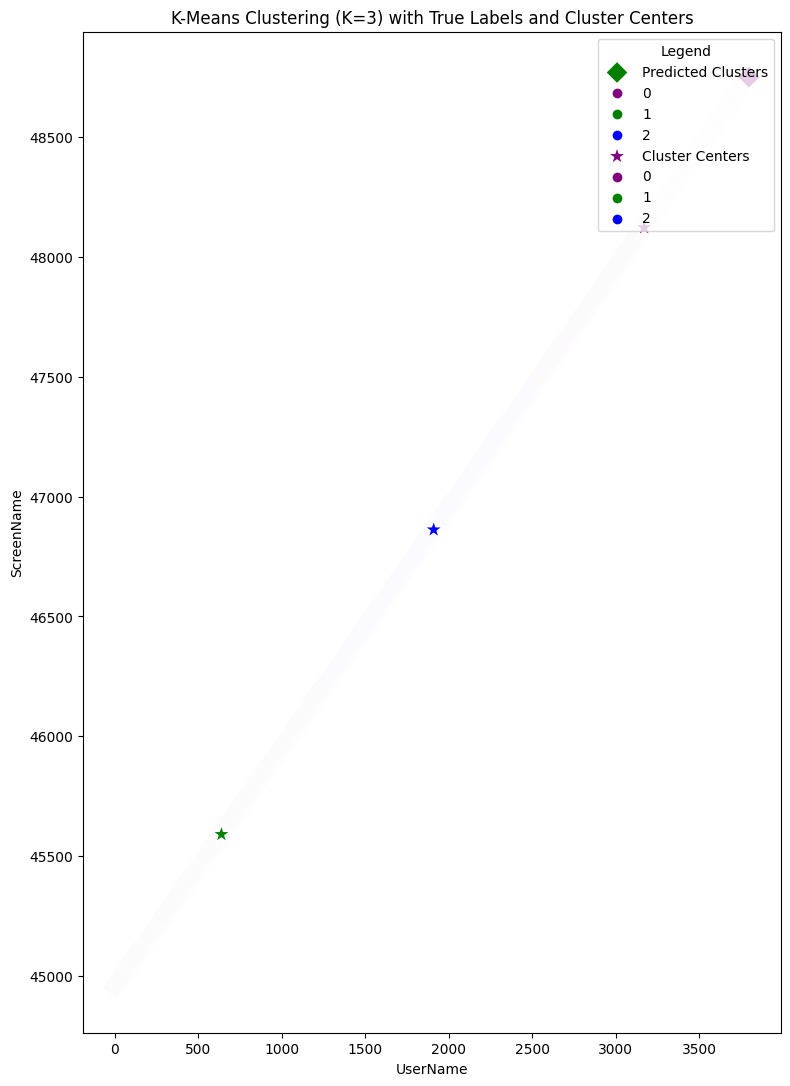

In [68]:
plt.figure(figsize=(9, 13))
colors = ["purple", "green", "blue"]

# Scatter plot hasil prediksi clustering
sns.scatterplot(data=df, x="UserName", y="ScreenName", palette=colors,
                hue=df["cluster_mapped"], marker="D", s=130, label="Predicted Clusters")

# Tambahkan titik pusat cluster
cluster_centers = df.groupby("cluster_mapped").mean()
sns.scatterplot(data=cluster_centers, x=cluster_centers["UserName"], y=cluster_centers["ScreenName"],
                palette=colors, hue=cluster_centers.index, marker="*", s=200, label="Cluster Centers")

plt.title("K-Means Clustering (K=3) with True Labels and Cluster Centers")
plt.xlabel("UserName")
plt.ylabel("ScreenName")
plt.legend(title="Legend", loc="upper right")
plt.show()